In [27]:
import json

def load_json_data():
    with open('../data/test_data.json') as f:
        data = json.loads(f.read())
        print(data)
        return data

data = load_json_data()

{'0': {'game_sequence': [1, 8, 14, 2, 7, 0, 3, 1, 10], 'last_tile': 0, 'score': 9, 'user_id': 3472, 'game_id': 838574}, '1': {'game_sequence': [4, 1, 5, 6, 10, 15, 4], 'last_tile': 8, 'score': 7, 'user_id': 8978, 'game_id': 484273}, '2': {'game_sequence': [11, 11, 10, 4, 4, 10, 14, 8, 12, 11, 15], 'last_tile': 5, 'score': 11, 'user_id': 6185, 'game_id': 632688}, '3': {'game_sequence': [], 'last_tile': 5, 'score': 0, 'user_id': 4068, 'game_id': 448515}, '4': {'game_sequence': [14], 'last_tile': 12, 'score': 1, 'user_id': 4443, 'game_id': 706129}, '5': {'game_sequence': [12, 7, 3, 12, 9, 11, 7, 0, 11, 4, 6, 9, 14, 4, 6, 1], 'last_tile': 14, 'score': 16, 'user_id': 9890, 'game_id': 966101}, '6': {'game_sequence': [15, 2, 10, 15, 8, 8, 4, 10, 8, 5, 1, 9], 'last_tile': 2, 'score': 12, 'user_id': 2925, 'game_id': 161453}, '7': {'game_sequence': [8, 5, 9, 3, 0], 'last_tile': 12, 'score': 5, 'user_id': 5795, 'game_id': 907592}, '8': {'game_sequence': [9, 4, 11, 7, 7, 9, 8, 7, 3], 'last_tile': 

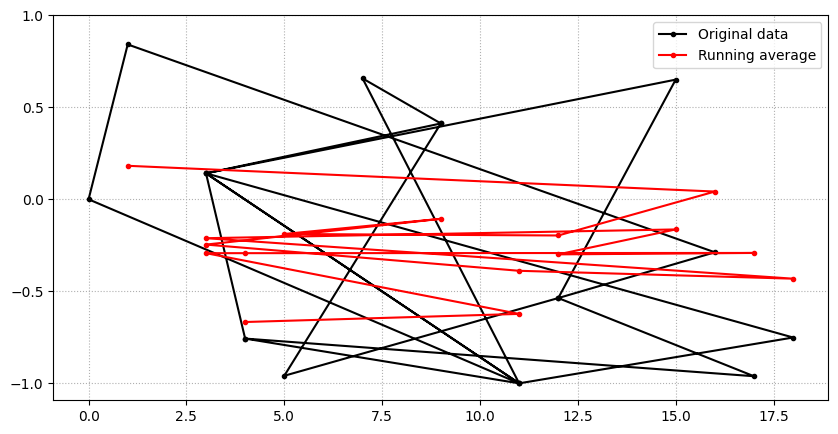

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json

scores = []
last_tiles = []

for i in data.keys():
    last_tiles.append(data[i]['last_tile'])
    scores.append(data[i]['score'])

print(scores)
print(last_tiles)

# %qtconsole